In [5]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os.path
import pickle

In [2]:
model = VGG16(weights='imagenet', include_top=False)

In [3]:
Category = ["Men's_Shirts", 'Chiffon', 'Jeans']
image_names=[]


for i in range(0,len(Category)) :
    path = '/Users/Student/Downloads/visual_search/models/Data/Semi_train/' + Category[i]
    for img_path in os.listdir(path):
        if('.DS_Store' not in os.path.join(path,img_path)):
            image_names.append(img_path)
        

In [4]:
image_names

['4153_comsumer_08.jpg',
 '4154_shop_01.jpg',
 '4155_shop_02.jpg',
 '4156_comsumer_07.jpg',
 '4157_comsumer_06.jpg',
 '4158_comsumer_04.jpg',
 '4159_comsumer_05.jpg',
 '4160_comsumer_01.jpg',
 '4161_comsumer_02.jpg',
 '4162_comsumer_03.jpg',
 '4163_shop_01.jpg',
 '4164_comsumer_01.jpg',
 '4165_shop_01.jpg',
 '4166_comsumer_01.jpg',
 '4167_shop_01.jpg',
 '4168_comsumer_01.jpg',
 '4169_shop_01.jpg',
 '4170_comsumer_01.jpg',
 '4171_shop_01.jpg',
 '4172_comsumer_01.jpg',
 '4173_shop_01.jpg',
 '4174_comsumer_01.jpg',
 '4175_comsumer_08.jpg',
 '4176_shop_01.jpg',
 '4177_shop_02.jpg',
 '4178_comsumer_07.jpg',
 '4179_comsumer_06.jpg',
 '4180_comsumer_04.jpg',
 '4181_comsumer_05.jpg',
 '4182_comsumer_01.jpg',
 '4183_comsumer_02.jpg',
 '4184_comsumer_03.jpg',
 '4185_shop_01.jpg',
 '4186_comsumer_04.jpg',
 '4187_comsumer_05.jpg',
 '4188_comsumer_01.jpg',
 '4189_comsumer_02.jpg',
 '4190_comsumer_03.jpg',
 '4191_shop_01.jpg',
 '4192_shop_02.jpg',
 '4193_comsumer_01.jpg',
 '4194_comsumer_02.jpg',
 '

In [8]:
start = time.time()
Category = ["Men's_Shirts", 'Chiffon', 'Jeans']


pickled_db_path = "features_vgg16/" + Category[0] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        vgg_loaded_1 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [9]:
pickled_db_path = "features_vgg16/" + Category[0] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        vgg_loaded_2 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [10]:
vgg_loaded = np.append(vgg_loaded_1, vgg_loaded_2,axis=0)

In [11]:
pickled_db_path = "features_vgg16/" + Category[0] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        vgg_loaded_3 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [12]:
vgg_loaded = np.append(vgg_loaded, vgg_loaded_3,axis=0)

In [13]:
vgg_loaded.shape

(3171, 25088)

In [14]:
# query_image_path = "C:/Users/SAI SUPRAJA M/Desktop/visual_search/Data/Semi_train/Chiffon/40632_shop_01.jpg"
query_image_path= "images_for_testing/108_comsumer_03.jpg"
imgq = image.load_img(query_image_path, target_size=(224, 224))
img_dataq = image.img_to_array(imgq)
img_dataq = np.expand_dims(img_dataq, axis=0)
img_dataq = preprocess_input(img_dataq)
vgg16_feature_query = model.predict(img_dataq)
vgg16_feature_np_query = np.array(vgg16_feature_query)
vgg16_feature_np_query = vgg16_feature_np_query.flatten()

In [15]:
vgg16_feature_np_query.shape

(25088,)

In [16]:
from scipy.spatial import distance

similarity = []
count = 0

for i in vgg_loaded:
    count = count+1
    d = distance.cosine(i,vgg16_feature_np_query)
    sim = 1-d
    similarity.append((sim,image_names[count-1]))


In [17]:
similarity

[(0.19014781713485718, '4153_comsumer_08.jpg'),
 (0.058716583997011185, '4154_shop_01.jpg'),
 (0.05713401362299919, '4155_shop_02.jpg'),
 (0.1234707459807396, '4156_comsumer_07.jpg'),
 (0.15963327884674072, '4157_comsumer_06.jpg'),
 (0.07925610989332199, '4158_comsumer_04.jpg'),
 (0.07811306416988373, '4159_comsumer_05.jpg'),
 (0.10274726152420044, '4160_comsumer_01.jpg'),
 (0.06167631596326828, '4161_comsumer_02.jpg'),
 (0.0730980783700943, '4162_comsumer_03.jpg'),
 (0.07747987657785416, '4163_shop_01.jpg'),
 (0.08647286891937256, '4164_comsumer_01.jpg'),
 (0.04451307654380798, '4165_shop_01.jpg'),
 (0.08000785857439041, '4166_comsumer_01.jpg'),
 (0.06338071078062057, '4167_shop_01.jpg'),
 (0.09018494933843613, '4168_comsumer_01.jpg'),
 (0.07491488009691238, '4169_shop_01.jpg'),
 (0.10492800176143646, '4170_comsumer_01.jpg'),
 (0.08798561245203018, '4171_shop_01.jpg'),
 (0.04156583920121193, '4172_comsumer_01.jpg'),
 (0.0495685450732708, '4173_shop_01.jpg'),
 (0.16008517146110535, '41

In [18]:
def show_img(path):
    img =imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()

Query image ==========================================


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


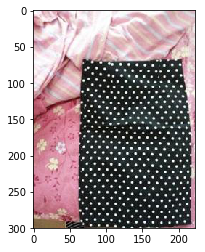

Result images ========================================
similarity 0.2978890538215637


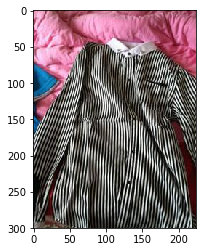

similarity 0.2978890538215637


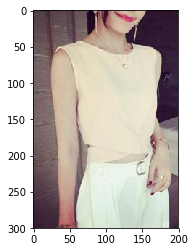

similarity 0.2978890538215637


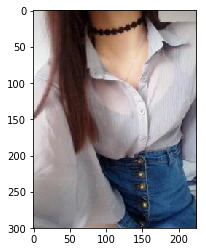

similarity 0.27918046712875366


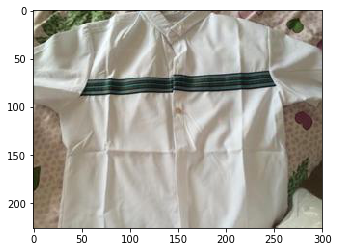

similarity 0.27918046712875366


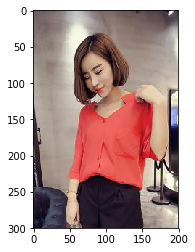

similarity 0.27918046712875366


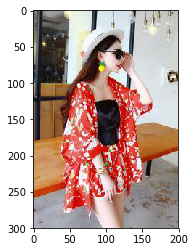

In [19]:
# After sorting images through similarity
des_similarity = sorted(similarity,reverse=True)
des_similarity =des_similarity[:6]


path1= '/Users/Student/Downloads/visual_search/models/Data/total_data/'

print ('Query image ==========================================')
show_img(query_image_path)


print ('Result images ========================================')
for i in range(0,len(des_similarity)):
    print("similarity",des_similarity[i][0])
    result_image_path = path1+ "/"+des_similarity[i][1]
    if(os.path.isfile(result_image_path) ):
        show_img(result_image_path)
        
        
    
end = time.time()

In [20]:
total_time_main = end - start
print("total_time_main", total_time_main)

total_time_main 81.20489597320557
